# Industrial Human Resource Geo-Visualization

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

Merge all the CSV Data File

In [5]:
df1 = pd.read_csv("C:/Users/anand/Desktop/DataSets/DataSets/DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv", encoding='latin1')
df2 = pd.read_csv("C:/Users/anand/Desktop/DataSets/DataSets/DDW_B18_1200_NIC_FINAL_STATE_ARUNACHAL_PRADESH-2011.csv", encoding='latin1')
df3 = pd.read_csv("C:/Users/anand/Desktop/DataSets/DataSets/DDW_B18_1400_NIC_FINAL_STATE_MANIPUR-2011.csv", encoding='latin1')
df4 = pd.read_csv("C:/Users/anand/Desktop/DataSets/DataSets/DDW_B18_1500_NIC_FINAL_STATE_MIZORAM-2011.csv", encoding='latin1')
df5 = pd.read_csv("C:/Users/anand/Desktop/DataSets/DataSets/DDW_B18_1900_NIC_FINAL_STATE_WEST_BENGAL-2011.csv", encoding='latin1')
df6 = pd.read_csv("C:/Users/anand/Desktop/DataSets/DataSets/DDW_B18sc_0700_NIC_FINAL_STATE_NCT_OF_DELHI-2011.csv", encoding='latin1')
df7 = pd.read_csv("C:/Users/anand/Desktop/DataSets/DataSets/DDW_B18sc_1600_NIC_FINAL_STATE_TRIPURA-2011.csv", encoding='latin1')
df8 = pd.read_csv("C:/Users/anand/Desktop/DataSets/DataSets/DDW_B18sc_2000_NIC_FINAL_STATE_JHARKHAND-2011.csv", encoding='latin1')
df9 = pd.read_csv("C:/Users/anand/Desktop/DataSets/DataSets/DDW_B18sc_2400_NIC_FINAL_STATE_GUJARAT-2011.csv", encoding='latin1')
df10 = pd.read_csv("C:/Users/anand/Desktop/DataSets/DataSets/DDW_B18sc_2700_NIC_FINAL_STATE_MAHARASHTRA-2011.csv", encoding='latin1')
df11 = pd.read_csv("C:/Users/anand/Desktop/DataSets/DataSets/DDW_B18sc_2900_NIC_FINAL_STATE_KARNATAKA-2011.csv", encoding='latin1')
df12 = pd.read_csv("C:/Users/anand/Desktop/DataSets/DataSets/DDW_B18sc_3000_NIC_FINAL_STATE_GOA-2011.csv", encoding='latin1')
df13 = pd.read_csv("C:/Users/anand/Desktop/DataSets/DataSets/DDW_B18sc_3200_NIC_FINAL_STATE_KERALA-2011.csv", encoding='latin1')
df14 = pd.read_csv("C:/Users/anand/Desktop/DataSets/DataSets/DDW_B18sc_3300_NIC_FINAL_STATE_TAMIL_NADU-2011.csv", encoding='latin1')
df15 = pd.read_csv("C:/Users/anand/Desktop/DataSets/DataSets/DDW_B18sc_3400_NIC_FINAL_STATE_PUDUCHERRY-2011.csv", encoding='latin1')
df16 = pd.read_csv("C:/Users/anand/Desktop/DataSets/DataSets/DDW_B18st_0200_NIC_FINAL_STATE_HIMACHAL_PRADESH-2011.csv", encoding='latin1')
df17 = pd.read_csv("C:/Users/anand/Desktop/DataSets/DataSets/DDW_B18st_0500_NIC_FINAL_STATE_UTTARAKHAND-2011.csv", encoding='latin1')
df18 = pd.read_csv("C:/Users/anand/Desktop/DataSets/DataSets/DDW_B18st_0900_NIC_FINAL_STATE_UTTAR_PRADESH-2011.csv", encoding='latin1')
df19 = pd.read_csv("C:/Users/anand/Desktop/DataSets/DataSets/DDW_B18st_1000_NIC_FINAL_STATE_BIHAR-2011.csv", encoding='latin1')
df20 = pd.read_csv("C:/Users/anand/Desktop/DataSets/DataSets/DDW_B18st_1100_NIC_FINAL_STATE_SIKKIM-2011.csv", encoding='latin1')
df21 = pd.read_csv("C:/Users/anand/Desktop/DataSets/DataSets/DDW_B18st_1300_NIC_FINAL_STATE_NAGALAND-2011.csv", encoding='latin1')
df22 = pd.read_csv("C:/Users/anand/Desktop/DataSets/DataSets/DDW_B18st_1800_NIC_FINAL_STATE_ASSAM-2011.csv", encoding='latin1')
df23 = pd.read_csv("C:/Users/anand/Desktop/DataSets/DataSets/DDW_B18st_2100_NIC_FINAL_STATE_ODISHA-2011.csv", encoding='latin1')

In [6]:
# Combine all DataFrames into one
Merge_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23])

In [7]:
Merge_df.head()

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`08,`000,STATE - RAJASTHAN,`00,`000,`0000,Total,9017944,7594737,1423207,...,618445,2307752,1046813,1260939,1825830,749381,1076449,481922,297432,184490
1,`08,`000,STATE - RAJASTHAN,`01,`000,`0000,"Crop and animal production, hunting and relate...",450766,201572,249194,...,19810,408728,76106,332622,390864,71124,319740,17864,4982,12882
2,`08,`000,STATE - RAJASTHAN,`01,`011,`0000,Growing of non-perennial crops,12876,10547,2329,...,1013,9562,4051,5511,8147,3295,4852,1415,756,659
3,`08,`000,STATE - RAJASTHAN,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",12061,9911,2150,...,942,9085,3883,5202,7777,3161,4616,1308,722,586
4,`08,`000,STATE - RAJASTHAN,`01,`011,`0112,Growing of rice,79,71,8,...,2,13,4,9,11,2,9,2,2,0


In [8]:
# Display the merged DataFrame Columns
Merge_df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females'],
      dtype='object')

In [9]:
# Replace special characters in column names
Merge_df.columns = Merge_df.columns.str.replace('[^A-Za-z0-9 ]+', '', regex=True)

# Display updated column names
Merge_df.columns

Index(['State Code', 'District Code', 'IndiaStates', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers  Total   Persons',
       'Main Workers  Total  Males', 'Main Workers  Total  Females',
       'Main Workers  Rural   Persons', 'Main Workers  Rural  Males',
       'Main Workers  Rural  Females', 'Main Workers  Urban   Persons',
       'Main Workers  Urban  Males', 'Main Workers  Urban  Females',
       'Marginal Workers  Total   Persons', 'Marginal Workers  Total  Males',
       'Marginal Workers  Total  Females', 'Marginal Workers  Rural   Persons',
       'Marginal Workers  Rural  Males', 'Marginal Workers  Rural  Females',
       'Marginal Workers  Urban   Persons', 'Marginal Workers  Urban  Males',
       'Marginal Workers  Urban  Females'],
      dtype='object')

EDA

In [11]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Identify columns with non-numeric data
non_numeric_columns = Merge_df.select_dtypes(exclude=[float, int]).columns

# Drop non-numeric columns from the DataFrame
numeric_df = Merge_df.drop(columns=non_numeric_columns)

# Calculate correlation
correlation_matrix = numeric_df.corr()
correlation_matrix

,Main Workers Total Persons,Main Workers Total Males,Main Workers Total Females,Main Workers Rural Persons,Main Workers Rural Males,Main Workers Rural Females,Main Workers Urban Persons,Main Workers Urban Males,Main Workers Urban Females,Marginal Workers Total Persons,Marginal Workers Total Males,Marginal Workers Total Females,Marginal Workers Rural Persons,Marginal Workers Rural Males,Marginal Workers Rural Females,Marginal Workers Urban Persons,Marginal Workers Urban Males,Marginal Workers Urban Females
Main Workers Total Persons,1.000000,0.996935,0.938961,0.982750,0.981071,0.895108,0.989260,0.987095,0.926007,0.931390,0.962609,0.858475,0.904754,0.942542,0.829537,0.914343,0.954722,0.819452
Main Workers Total Males,0.996935,1.000000,0.909170,0.978081,0.983617,0.863221,0.987538,0.990488,0.899947,0.917952,0.960615,0.835229,0.891626,0.941126,0.807887,0.901310,0.951808,0.795125
Main Workers Total Females,0.938961,0.909170,1.000000,0.930049,0.896767,0.968629,0.923119,0.898621,0.971606,0.921079,0.899647,0.896725,0.895065,0.878534,0.862926,0.903520,0.896394,0.865368
Main Workers Rural Persons,0.982750,0.978081,0.930049,1.000000,0.994983,0.923504,0.945163,0.943646,0.882093,0.944638,0.967549,0.878677,0.937471,0.968126,0.866199,0.884830,0.923402,0.793600
Main Workers Rural Males,0.981071,0.983617,0.896767,0.994983,1.000000,0.880497,0.946163,0.949457,0.860010,0.928626,0.968135,0.848275,0.919353,0.968428,0.834551,0.874606,0.924458,0.770562
Main Workers Rural Females,0.895108,0.863221,0.968629,0.923504,0.880497,1.000000,0.850849,0.831031,0.882326,0.915601,0.872677,0.911129,0.917198,0.874288,0.904626,0.839329,0.830955,0.805962
Main Workers Urban Persons,0.989260,0.987538,0.923119,0.945163,0.946163,0.850849,1.000000,0.997376,0.938144,0.898218,0.935242,0.821584,0.856844,0.899349,0.780343,0.915382,0.956206,0.819911
Main Workers Urban Males,0.987095,0.990488,0.898621,0.943646,0.949457,0.831031,0.997376,1.000000,0.910616,0.889594,0.933726,0.806883,0.850832,0.899567,0.769749,0.901849,0.951729,0.796367
Main Workers Urban Females,0.926007,0.899947,0.971606,0.882093,0.860010,0.882326,0.938144,0.910616,1.000000,0.872630,0.872908,0.830766,0.821844,0.831390,0.772949,0.911994,0.906471,0.871509
Marginal Workers Total Persons,0.931390,0.917952,0.921079,0.944638,0.928626,0.915601,0.898218,0.889594,0.872630,1.000000,0.972667,0.977270,0.988355,0.967617,0.954814,0.945380,0.938114,0.905235


In [12]:
# Shape of the DF
Merge_df.shape

(195145, 25)

In [13]:
Merge_df.head()

,State Code,District Code,IndiaStates,Division,Group,Class,NIC Name,Main Workers Total Persons,Main Workers Total Males,Main Workers Total Females,...,Main Workers Urban Females,Marginal Workers Total Persons,Marginal Workers Total Males,Marginal Workers Total Females,Marginal Workers Rural Persons,Marginal Workers Rural Males,Marginal Workers Rural Females,Marginal Workers Urban Persons,Marginal Workers Urban Males,Marginal Workers Urban Females
0,`08,`000,STATE - RAJASTHAN,`00,`000,`0000,Total,9017944,7594737,1423207,...,618445,2307752,1046813,1260939,1825830,749381,1076449,481922,297432,184490
1,`08,`000,STATE - RAJASTHAN,`01,`000,`0000,"Crop and animal production, hunting and relate...",450766,201572,249194,...,19810,408728,76106,332622,390864,71124,319740,17864,4982,12882
2,`08,`000,STATE - RAJASTHAN,`01,`011,`0000,Growing of non-perennial crops,12876,10547,2329,...,1013,9562,4051,5511,8147,3295,4852,1415,756,659
3,`08,`000,STATE - RAJASTHAN,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",12061,9911,2150,...,942,9085,3883,5202,7777,3161,4616,1308,722,586
4,`08,`000,STATE - RAJASTHAN,`01,`011,`0112,Growing of rice,79,71,8,...,2,13,4,9,11,2,9,2,2,0


In [14]:
Merge_df.describe()

,Main Workers Total Persons,Main Workers Total Males,Main Workers Total Females,Main Workers Rural Persons,Main Workers Rural Males,Main Workers Rural Females,Main Workers Urban Persons,Main Workers Urban Males,Main Workers Urban Females,Marginal Workers Total Persons,Marginal Workers Total Males,Marginal Workers Total Females,Marginal Workers Rural Persons,Marginal Workers Rural Males,Marginal Workers Rural Females,Marginal Workers Urban Persons,Marginal Workers Urban Males,Marginal Workers Urban Females
count,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,195145.000000,195145.000000
mean,1.492138e+03,1.193171e+03,2.989664e+02,6.606187e+02,5.170353e+02,1.435834e+02,8.315188e+02,6.761358e+02,1.553830e+02,3.642672e+02,1.826322e+02,1.816350e+02,2.502286e+02,1.165241e+02,1.337045e+02,1.140386e+02,66.108094,47.930472
std,4.568169e+04,3.773917e+04,8.582019e+03,2.044436e+04,1.654295e+04,4.314446e+03,2.586781e+04,2.167339e+04,4.531593e+03,1.176940e+04,5.760575e+03,6.309699e+03,8.232274e+03,3.723078e+03,4.748460e+03,3.842889e+03,2132.581727,1803.271234
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,6.000000e+00,6.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,2.800000e+01,2.300000e+01,3.000000e+00,1.200000e+01,8.000000e+00,0.000000e+00,1.200000e+01,9.000000e+00,0.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,1.880000e+02,1.450000e+02,2.400000e+01,7.400000e+01,5.600000e+01,8.000000e+00,8.600000e+01,6.700000e+01,1.200000e+01,2.800000e+01,1.800000e+01,6.000000e+00,1.400000e+01,8.000000e+00,3.000000e+00,9.000000e+00,6.000000,2.000000
max,1.561976e+07,1.280140e+07,2.818356e+06,6.770444e+06,5.446541e+06,1.323903e+06,8.849315e+06,7.354862e+06,1.494453e+06,3.834122e+06,1.966750e+06,1.867372e+06,2.515182e+06,1.223824e+06,1.291358e+06,1.318940e+06,742926.000000,576014.000000


In [15]:
Merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195145 entries, 0 to 12046
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   State Code                         195145 non-null  object
 1   District Code                      195145 non-null  object
 2   IndiaStates                        195145 non-null  object
 3   Division                           195145 non-null  object
 4   Group                              195145 non-null  object
 5   Class                              195145 non-null  object
 6   NIC Name                           195145 non-null  object
 7   Main Workers  Total   Persons      195145 non-null  int64 
 8   Main Workers  Total  Males         195145 non-null  int64 
 9   Main Workers  Total  Females       195145 non-null  int64 
 10  Main Workers  Rural   Persons      195145 non-null  int64 
 11  Main Workers  Rural  Males         195145 non-null  int64 

In [16]:
# Calculate the number of unique values in each column
unique_values_count = Merge_df.nunique()
unique_values_count

State Code                             23
District Code                         472
IndiaStates                           491
Division                               89
Group                                 241
Class                                 423
NIC Name                              587
Main Workers  Total   Persons        8679
Main Workers  Total  Males           7811
Main Workers  Total  Females         3970
Main Workers  Rural   Persons        5767
Main Workers  Rural  Males           5218
Main Workers  Rural  Females         2694
Main Workers  Urban   Persons        6561
Main Workers  Urban  Males           5934
Main Workers  Urban  Females         2929
Marginal Workers  Total   Persons    4208
Marginal Workers  Total  Males       3181
Marginal Workers  Total  Females     2850
Marginal Workers  Rural   Persons    3406
Marginal Workers  Rural  Males       2535
Marginal Workers  Rural  Females     2379
Marginal Workers  Urban   Persons    2421
Marginal Workers  Urban  Males    

In [17]:
# Check for missing values
missing_values = Merge_df.isnull().sum()
missing_values

State Code                           0
District Code                        0
IndiaStates                          0
Division                             0
Group                                0
Class                                0
NIC Name                             0
Main Workers  Total   Persons        0
Main Workers  Total  Males           0
Main Workers  Total  Females         0
Main Workers  Rural   Persons        0
Main Workers  Rural  Males           0
Main Workers  Rural  Females         0
Main Workers  Urban   Persons        0
Main Workers  Urban  Males           0
Main Workers  Urban  Females         0
Marginal Workers  Total   Persons    0
Marginal Workers  Total  Males       0
Marginal Workers  Total  Females     0
Marginal Workers  Rural   Persons    0
Marginal Workers  Rural  Males       0
Marginal Workers  Rural  Females     0
Marginal Workers  Urban   Persons    0
Marginal Workers  Urban  Males       0
Marginal Workers  Urban  Females     0
dtype: int64

Data Visualization

In [19]:
Merge_df.columns = Merge_df.columns.str.strip()
Merge_df.columns

Index(['State Code', 'District Code', 'IndiaStates', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers  Total   Persons',
       'Main Workers  Total  Males', 'Main Workers  Total  Females',
       'Main Workers  Rural   Persons', 'Main Workers  Rural  Males',
       'Main Workers  Rural  Females', 'Main Workers  Urban   Persons',
       'Main Workers  Urban  Males', 'Main Workers  Urban  Females',
       'Marginal Workers  Total   Persons', 'Marginal Workers  Total  Males',
       'Marginal Workers  Total  Females', 'Marginal Workers  Rural   Persons',
       'Marginal Workers  Rural  Males', 'Marginal Workers  Rural  Females',
       'Marginal Workers  Urban   Persons', 'Marginal Workers  Urban  Males',
       'Marginal Workers  Urban  Females'],
      dtype='object')

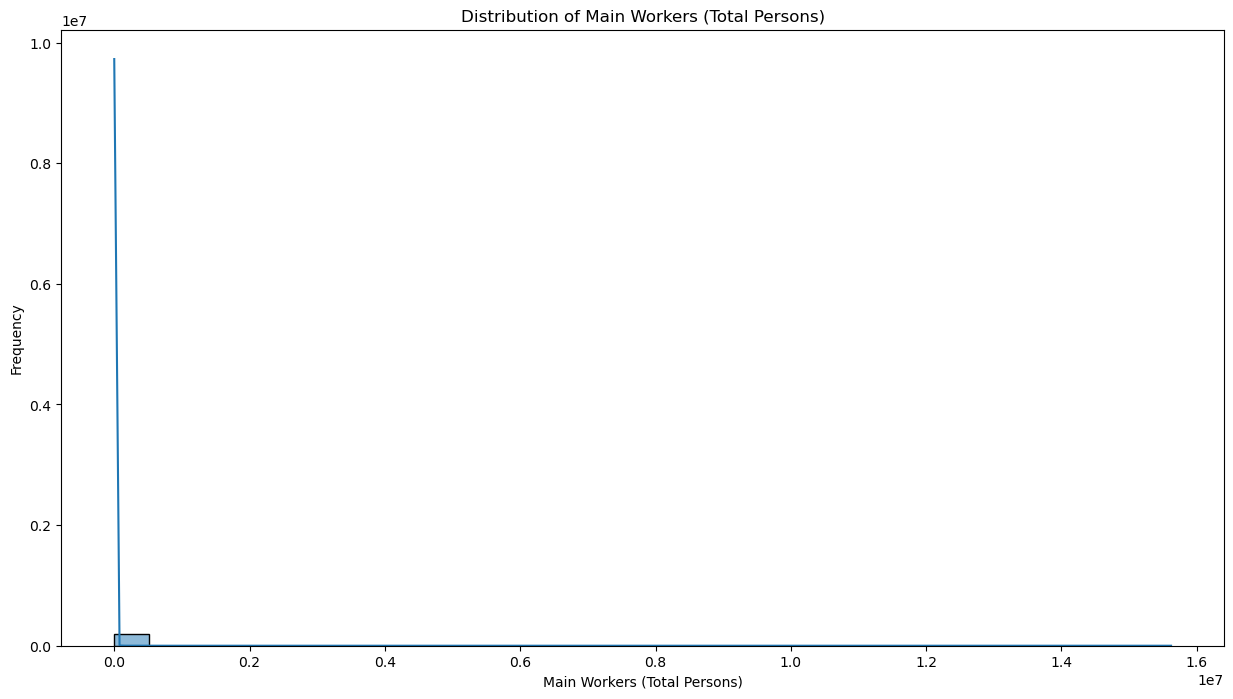

In [20]:
# Visualize the distribution of numeric data at Histogram
plt.figure(figsize=(15, 8))
sns.histplot(Merge_df['Main Workers  Total   Persons'], bins=30, kde=True)
plt.title('Distribution of Main Workers (Total Persons)')
plt.xlabel('Main Workers (Total Persons)')
plt.ylabel('Frequency')
plt.show()

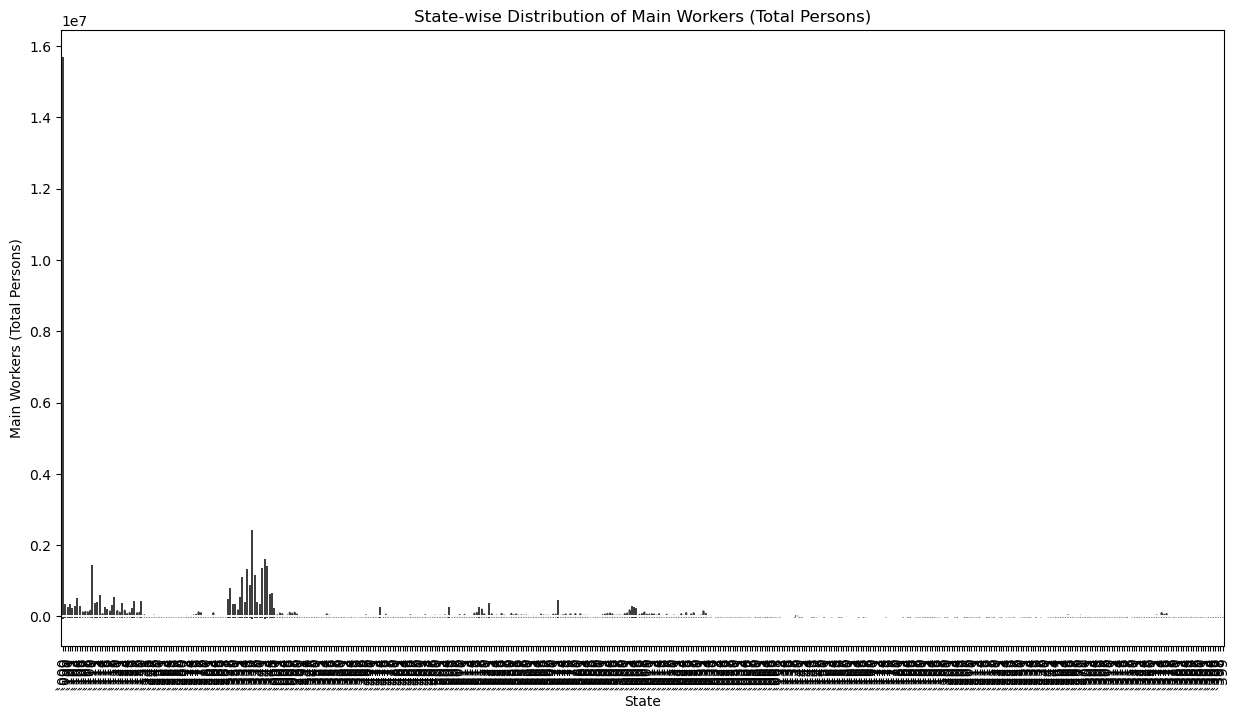

In [21]:
# Violin Plot
plt.figure(figsize=(15, 8))
sns.violinplot(x='District Code', y='Main Workers  Total   Persons', data=Merge_df)
plt.xticks(rotation=90)
plt.title('State-wise Distribution of Main Workers (Total Persons)')
plt.xlabel('State')
plt.ylabel('Main Workers (Total Persons)')
plt.show()

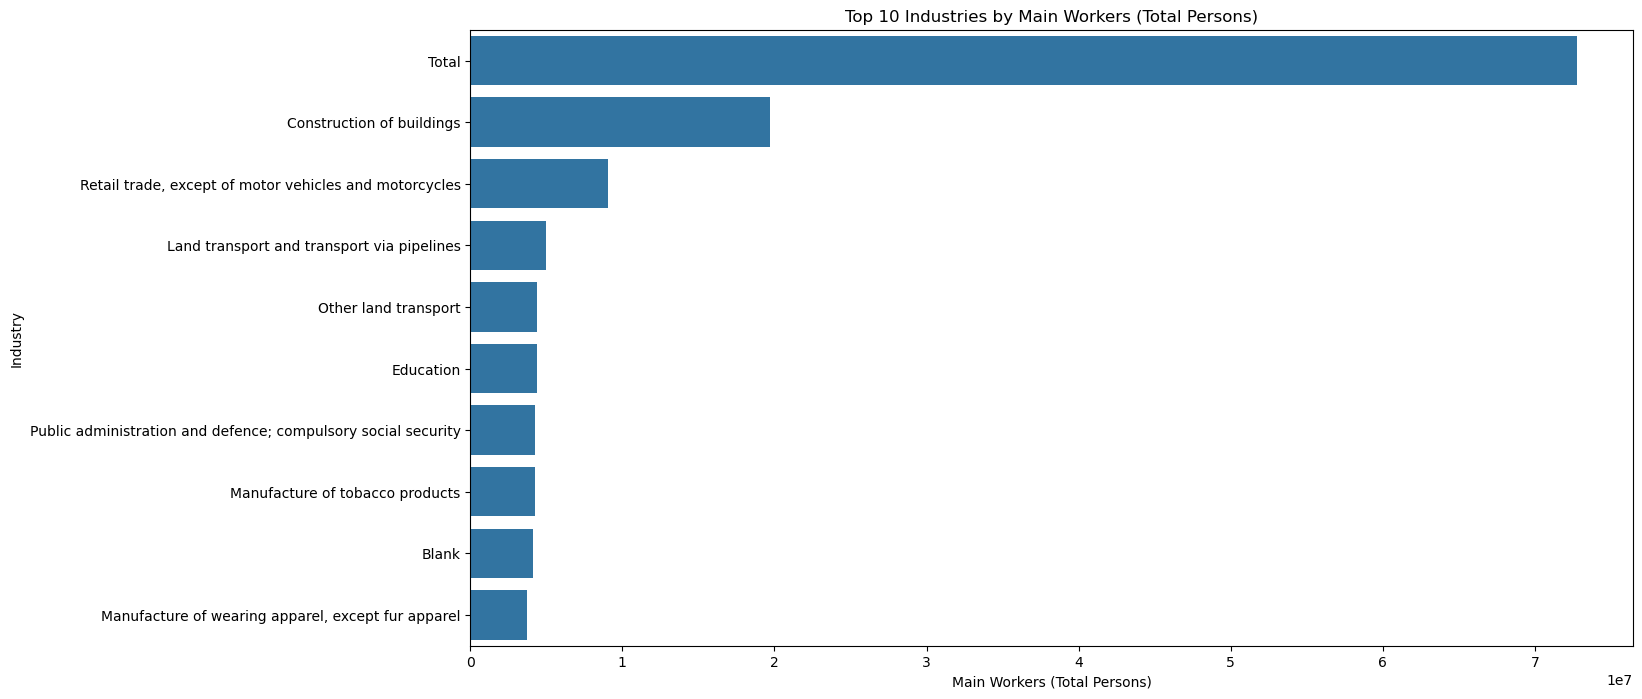

In [22]:
# Bar Plot
top_industries = Merge_df.groupby('NIC Name')['Main Workers  Total   Persons'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(15, 8))
sns.barplot(x=top_industries.values, y=top_industries.index)
plt.title('Top 10 Industries by Main Workers (Total Persons)')
plt.xlabel('Main Workers (Total Persons)')
plt.ylabel('Industry')
plt.show()

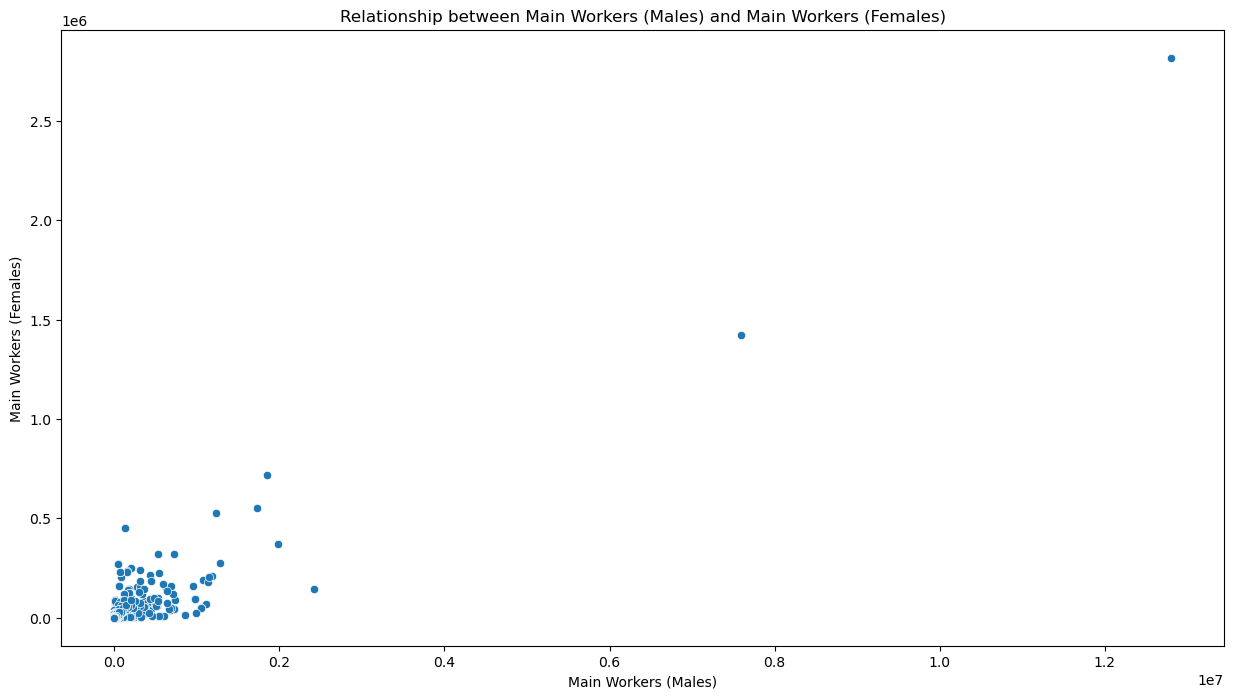

In [23]:
# Scatter Plot
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Main Workers  Total  Males', y='Main Workers  Total  Females', data=Merge_df)
plt.title('Relationship between Main Workers (Males) and Main Workers (Females)')
plt.xlabel('Main Workers (Males)')
plt.ylabel('Main Workers (Females)')
plt.show()

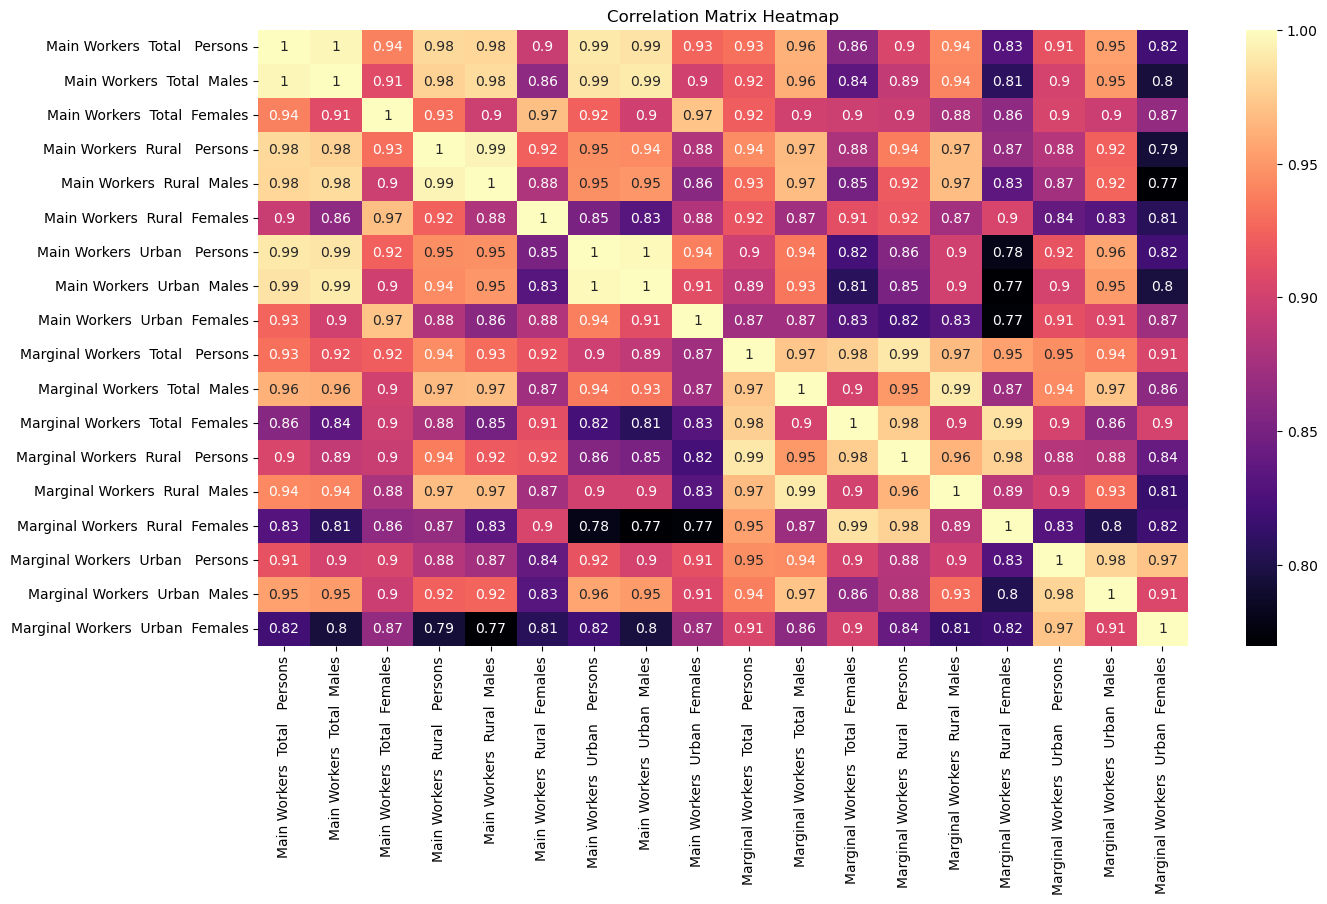

In [24]:
# Correlation Heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma')
plt.title('Correlation Matrix Heatmap')
plt.show()

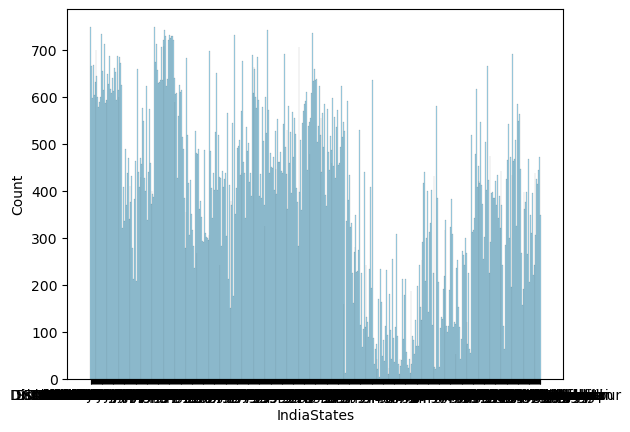

In [25]:
# sns.histplot
sns.histplot(x="IndiaStates", data=Merge_df, bins=20, color='skyblue')
plt.show()

Data Cleaning

In [27]:
Merge_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12042    False
12043    False
12044    False
12045    False
12046    False
Length: 195145, dtype: bool

In [28]:
Merge_df.dtypes

State Code                           object
District Code                        object
IndiaStates                          object
Division                             object
Group                                object
Class                                object
NIC Name                             object
Main Workers  Total   Persons         int64
Main Workers  Total  Males            int64
Main Workers  Total  Females          int64
Main Workers  Rural   Persons         int64
Main Workers  Rural  Males            int64
Main Workers  Rural  Females          int64
Main Workers  Urban   Persons         int64
Main Workers  Urban  Males            int64
Main Workers  Urban  Females          int64
Marginal Workers  Total   Persons     int64
Marginal Workers  Total  Males        int64
Marginal Workers  Total  Females      int64
Marginal Workers  Rural   Persons     int64
Marginal Workers  Rural  Males        int64
Marginal Workers  Rural  Females      int64
Marginal Workers  Urban   Person

In [29]:
# Removing the Unwanted Columns in Merge_df Columns
columns_to_drop = ['State Code', 'District Code', 'Division', 'Group', 'Class']
Merge_df = Merge_df.drop(columns=columns_to_drop)

In [30]:
Merge_df.columns

Index(['IndiaStates', 'NIC Name', 'Main Workers  Total   Persons',
       'Main Workers  Total  Males', 'Main Workers  Total  Females',
       'Main Workers  Rural   Persons', 'Main Workers  Rural  Males',
       'Main Workers  Rural  Females', 'Main Workers  Urban   Persons',
       'Main Workers  Urban  Males', 'Main Workers  Urban  Females',
       'Marginal Workers  Total   Persons', 'Marginal Workers  Total  Males',
       'Marginal Workers  Total  Females', 'Marginal Workers  Rural   Persons',
       'Marginal Workers  Rural  Males', 'Marginal Workers  Rural  Females',
       'Marginal Workers  Urban   Persons', 'Marginal Workers  Urban  Males',
       'Marginal Workers  Urban  Females'],
      dtype='object')

Feature Engineering

In [32]:
# Create 'TotalWorkers' column
Merge_df['TotalWorkers'] = Merge_df['Main Workers  Total   Persons'] + Merge_df['Marginal Workers  Total   Persons']

# Create 'MaleFemaleRatio' column, handling division by zero by replacing 0 with 1
Merge_df['MaleFemaleRatio'] = Merge_df['Main Workers  Total  Males'] / Merge_df['Main Workers  Total  Females'].replace(0, 1)

In [33]:
Merge_df[['TotalWorkers','MaleFemaleRatio']].isnull().sum()

TotalWorkers       0
MaleFemaleRatio    0
dtype: int64

In [34]:
# Sample data: State, Latitude, Longitude
data = {
    'State.Name': [
        'ANDAMAN AND NICOBAR', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 
        'CHANDIGARH', 'CHHATTISGARH', 'DADRA AND NAGAR HAVELI', 'DELHI', 'GOA', 
        'HARYANA', 'HIMACHAL PRADESH', 'JAMMU AND KASHMIR', 'JHARKHAND', 'KARNATAKA', 
        'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 
        'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ORISSA', 'PUDUCHERRY', 'PUNJAB', 
        'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARANCHAL', 
        'WEST BENGAL'
    ],
    'Latitude': [
        11.667026, 14.750429, 27.100399, 26.749981, 25.785414, 
        30.719997, 22.090420, 20.266578, 28.669993, 15.491997, 
        28.450006, 31.100025, 34.299959, 23.800393, 12.570381, 
        8.900373, 10.562573, 21.300391, 19.250232, 24.799971, 
        25.570492, 23.710399, 25.666998, 19.820430, 11.934994, 
        31.519974, 26.449999, 27.333330, 12.920386, 23.835404, 
        27.599981, 30.320409, 22.580390
    ],
    'Longitude': [
        92.735983, 78.570026, 93.616601, 94.216667, 87.479973, 
        76.780006, 82.159987, 73.016618, 77.230004, 73.818001, 
        77.019991, 77.166597, 74.466658, 86.419986, 76.919997, 
        76.569993, 72.636867, 76.130019, 73.160175, 93.950017, 
        91.880014, 92.720015, 94.116570, 85.900017, 79.830000, 
        75.980003, 74.639981, 88.616647, 79.150042, 91.279999, 
        78.050006, 78.050006, 88.329947
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('lat_long.csv', index=False)

In [35]:
# Replace 'file_path' with the path to your CSV file
file_path = 'lat_long.csv'

# Read the CSV file into a Pandas DataFrame
data_frame = pd.read_csv(file_path)

In [36]:
data_frame

,State.Name,Latitude,Longitude
0,ANDAMAN AND NICOBAR,11.667026,92.735983
1,ANDHRA PRADESH,14.750429,78.570026
2,ARUNACHAL PRADESH,27.100399,93.616601
3,ASSAM,26.749981,94.216667
4,BIHAR,25.785414,87.479973
5,CHANDIGARH,30.719997,76.780006
6,CHHATTISGARH,22.090420,82.159987
7,DADRA AND NAGAR HAVELI,20.266578,73.016618
8,DELHI,28.669993,77.230004
9,GOA,15.491997,73.818001


In [37]:
# Replace 'file_path' with the path to your CSV file
file_path = 'lat_long.csv'

# Read the CSV file into a Pandas DataFrame
data_frame = pd.read_csv(file_path)

# Check if 'latitude' and 'longitude' columns exist in the DataFrame
if 'Latitude' in data_frame.columns and 'Longitude' in data_frame.columns:
    # Concatenate latitude and longitude into a new column 'lat_long'
    data_frame['lat_long'] = data_frame['Latitude'].astype(str) + ',' + data_frame['Longitude'].astype(str)
    
    # Merge the new column with Merge_df
    Merge_df = pd.concat([Merge_df, data_frame[['Latitude', 'Longitude']]], axis=1)
    print("Concatenation successful!")
else:
    print("The required columns 'latitude' and 'longitude' are not present in the CSV file.")

Concatenation successful!


In [38]:
Merge_df.columns

Index(['IndiaStates', 'NIC Name', 'Main Workers  Total   Persons',
       'Main Workers  Total  Males', 'Main Workers  Total  Females',
       'Main Workers  Rural   Persons', 'Main Workers  Rural  Males',
       'Main Workers  Rural  Females', 'Main Workers  Urban   Persons',
       'Main Workers  Urban  Males', 'Main Workers  Urban  Females',
       'Marginal Workers  Total   Persons', 'Marginal Workers  Total  Males',
       'Marginal Workers  Total  Females', 'Marginal Workers  Rural   Persons',
       'Marginal Workers  Rural  Males', 'Marginal Workers  Rural  Females',
       'Marginal Workers  Urban   Persons', 'Marginal Workers  Urban  Males',
       'Marginal Workers  Urban  Females', 'TotalWorkers', 'MaleFemaleRatio',
       'Latitude', 'Longitude'],
      dtype='object')

In [39]:
Merge_df[['Latitude', 'Longitude']].isnull().sum()

Latitude     194386
Longitude    194386
dtype: int64

In [40]:
Merge_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12042    False
12043    False
12044     True
12045    False
12046     True
Length: 195145, dtype: bool

In [41]:
# Calculate the mean of the 'Latitude' and 'Longitude' columns
mean_latitude = Merge_df['Latitude'].mean()
mean_longitude = Merge_df['Longitude'].mean()

# Fill the missing values with their respective mean values
Merge_df['Latitude'].fillna(mean_latitude, inplace=True)
Merge_df['Longitude'].fillna(mean_longitude, inplace=True)

C:\Users\anand\AppData\Local\Temp\ipykernel_12872\2048974363.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Merge_df['Latitude'].fillna(mean_latitude, inplace=True)
C:\Users\anand\AppData\Local\Temp\ipykernel_12872\2048974363.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [42]:
Merge_df[['Latitude', 'Longitude']].isnull().sum()

Latitude     0
Longitude    0
dtype: int64

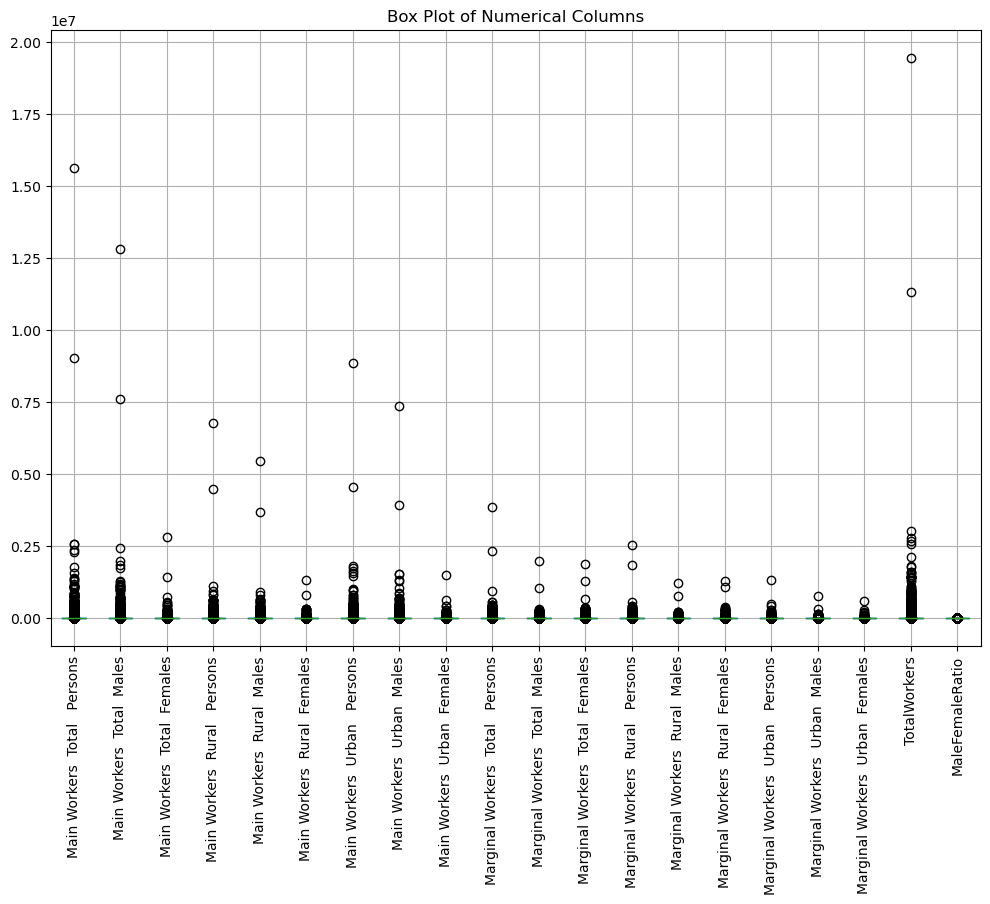

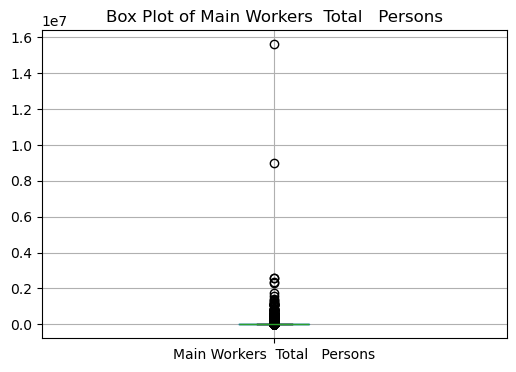

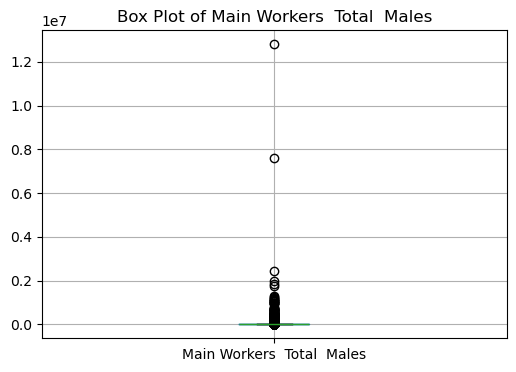

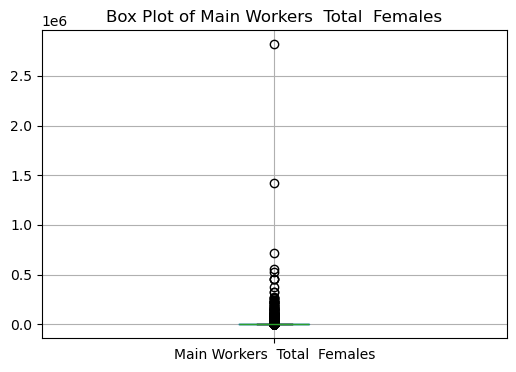

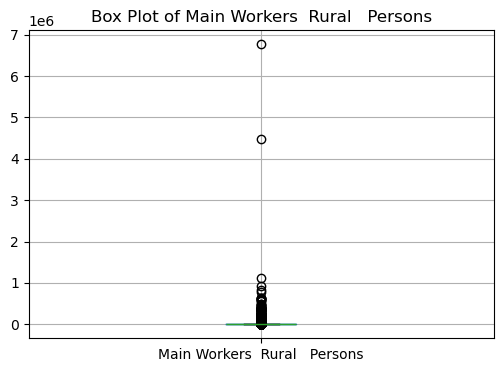

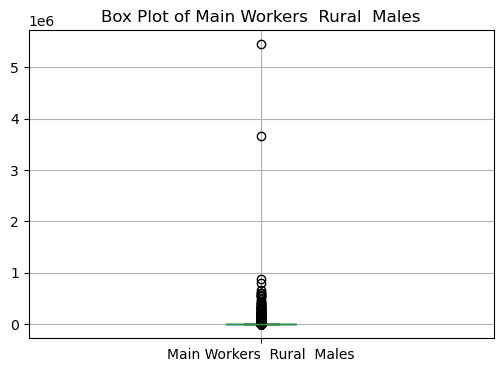

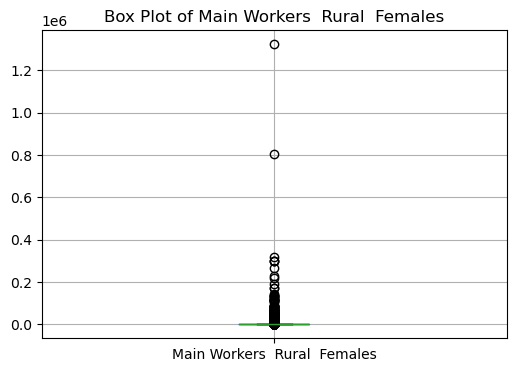

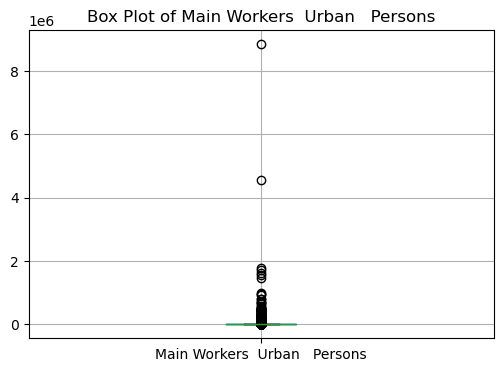

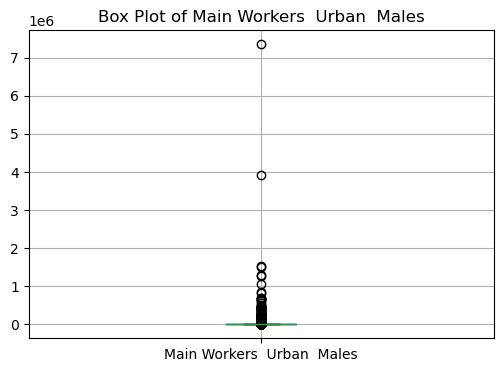

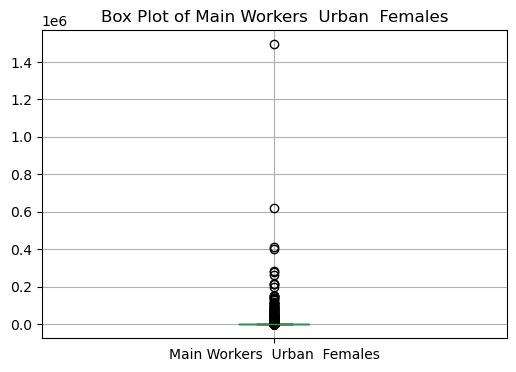

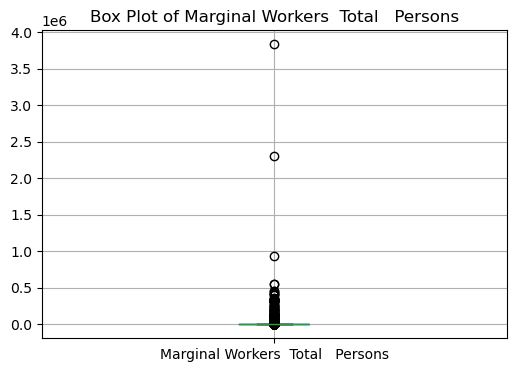

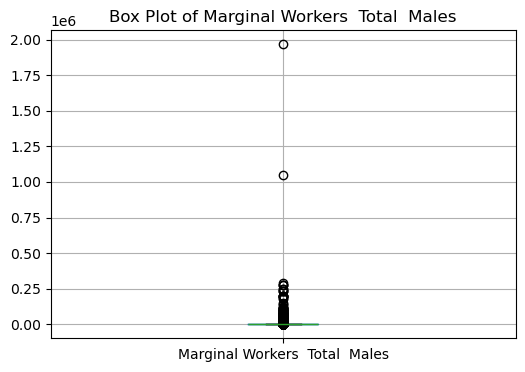

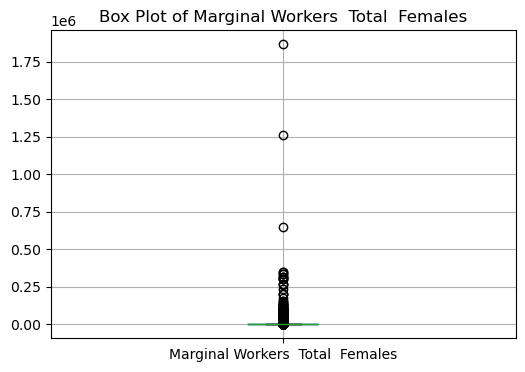

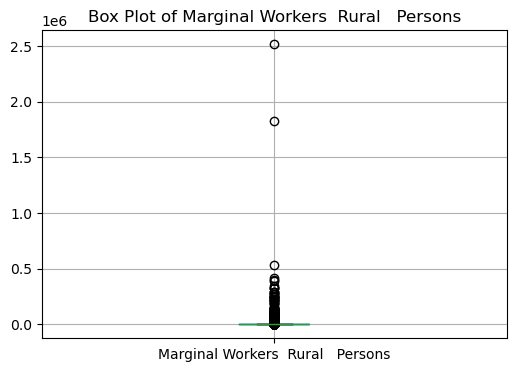

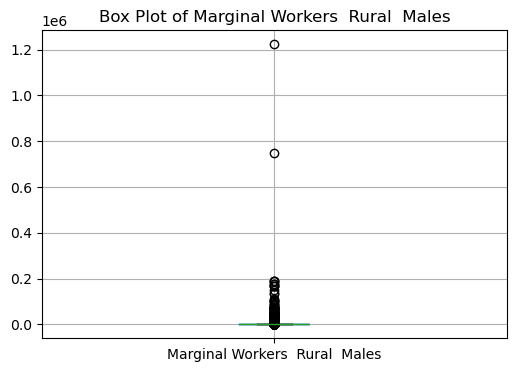

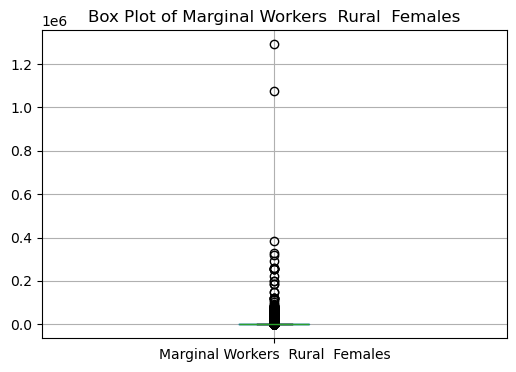

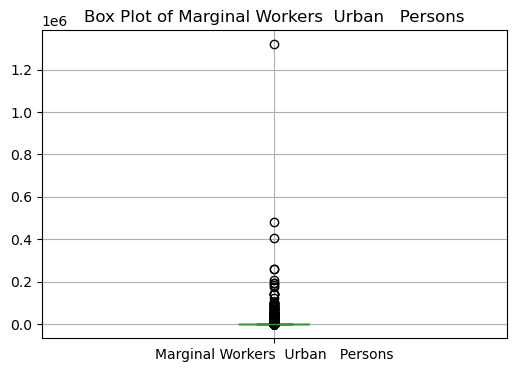

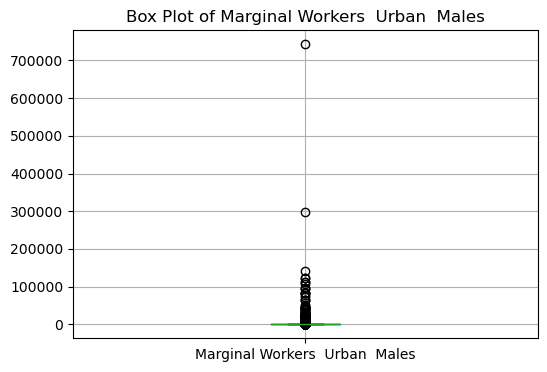

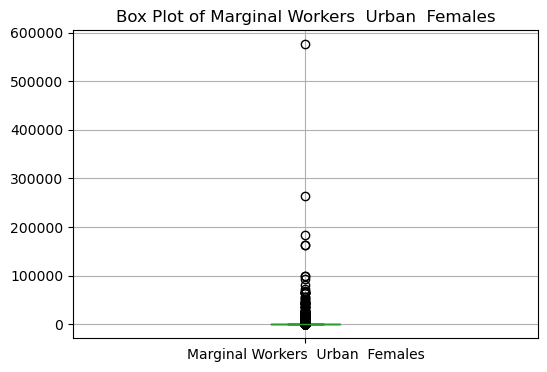

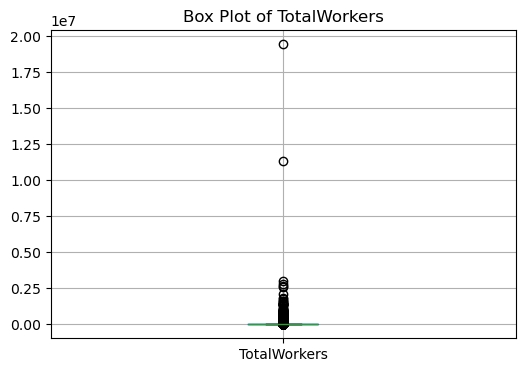

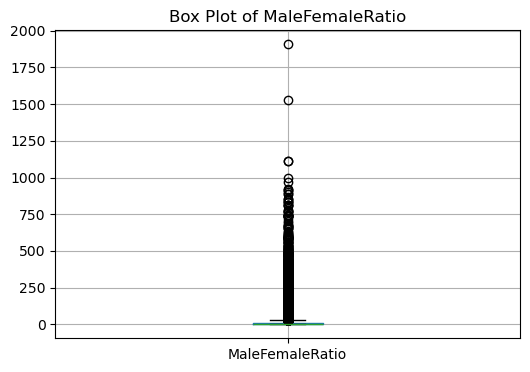

In [43]:
# Assuming df is your DataFrame
# Select only the numerical columns for outlier detection
Merge_df.columns = Merge_df.columns.str.strip()

numerical_columns = ['Main Workers  Total   Persons',
                     'Main Workers  Total  Males', 'Main Workers  Total  Females',
                     'Main Workers  Rural   Persons', 'Main Workers  Rural  Males',
                     'Main Workers  Rural  Females', 'Main Workers  Urban   Persons',
                     'Main Workers  Urban  Males', 'Main Workers  Urban  Females',
                     'Marginal Workers  Total   Persons', 'Marginal Workers  Total  Males',
                     'Marginal Workers  Total  Females', 'Marginal Workers  Rural   Persons',
                     'Marginal Workers  Rural  Males', 'Marginal Workers  Rural  Females',
                     'Marginal Workers  Urban   Persons', 'Marginal Workers  Urban  Males',
                     'Marginal Workers  Urban  Females', 'TotalWorkers', 'MaleFemaleRatio']

# Check if all columns are in the DataFrame
missing_columns = [col for col in numerical_columns if col not in Merge_df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Calculate outliers using Z-score
    z_scores = Merge_df[numerical_columns].apply(lambda x: (x - x.mean()) / x.std())

    # Set a threshold for Z-score (e.g., 3) to identify outliers
    threshold = 3
    outliers = (z_scores > threshold) | (z_scores < -threshold)

    # Plot Box Plots to visualize the distribution and outliers
    plt.figure(figsize=(12, 8))
    Merge_df[numerical_columns].boxplot()
    plt.title("Box Plot of Numerical Columns")
    plt.xticks(rotation=90)
    plt.show()

    # Plot Box Plots separately for each numerical column to focus on individual distributions
    for column in numerical_columns:
        plt.figure(figsize=(6, 4))
        Merge_df[[column]].boxplot()
        plt.title(f"Box Plot of {column}")
        plt.show()

In [44]:
Merge_df.shape

(195145, 24)

In [45]:
# Filter out the rows with outliers
non_outliers_mask = ~outliers.any(axis=1)
Merge_df_no_outliers = Merge_df[non_outliers_mask]

# Print the shape of the new DataFrame
print(Merge_df_no_outliers.shape)

(191481, 24)


In [46]:
Merge_df_no_outliers.columns

Index(['IndiaStates', 'NIC Name', 'Main Workers  Total   Persons',
       'Main Workers  Total  Males', 'Main Workers  Total  Females',
       'Main Workers  Rural   Persons', 'Main Workers  Rural  Males',
       'Main Workers  Rural  Females', 'Main Workers  Urban   Persons',
       'Main Workers  Urban  Males', 'Main Workers  Urban  Females',
       'Marginal Workers  Total   Persons', 'Marginal Workers  Total  Males',
       'Marginal Workers  Total  Females', 'Marginal Workers  Rural   Persons',
       'Marginal Workers  Rural  Males', 'Marginal Workers  Rural  Females',
       'Marginal Workers  Urban   Persons', 'Marginal Workers  Urban  Males',
       'Marginal Workers  Urban  Females', 'TotalWorkers', 'MaleFemaleRatio',
       'Latitude', 'Longitude'],
      dtype='object')

In [47]:
Merge_df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191481 entries, 2 to 12046
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   IndiaStates                        191481 non-null  object 
 1   NIC Name                           191481 non-null  object 
 2   Main Workers  Total   Persons      191481 non-null  int64  
 3   Main Workers  Total  Males         191481 non-null  int64  
 4   Main Workers  Total  Females       191481 non-null  int64  
 5   Main Workers  Rural   Persons      191481 non-null  int64  
 6   Main Workers  Rural  Males         191481 non-null  int64  
 7   Main Workers  Rural  Females       191481 non-null  int64  
 8   Main Workers  Urban   Persons      191481 non-null  int64  
 9   Main Workers  Urban  Males         191481 non-null  int64  
 10  Main Workers  Urban  Females       191481 non-null  int64  
 11  Marginal Workers  Total   Persons  191481 non

In [48]:
Merge_df_no_outliers.nunique()

IndiaStates                            491
NIC Name                               587
Main Workers  Total   Persons         8038
Main Workers  Total  Males            7210
Main Workers  Total  Females          3419
Main Workers  Rural   Persons         5193
Main Workers  Rural  Males            4682
Main Workers  Rural  Females          2238
Main Workers  Urban   Persons         6008
Main Workers  Urban  Males            5412
Main Workers  Urban  Females          2457
Marginal Workers  Total   Persons     3641
Marginal Workers  Total  Males        2678
Marginal Workers  Total  Females      2368
Marginal Workers  Rural   Persons     2932
Marginal Workers  Rural  Males        2103
Marginal Workers  Rural  Females      1976
Marginal Workers  Urban   Persons     1928
Marginal Workers  Urban  Males        1512
Marginal Workers  Urban  Females      1126
TotalWorkers                          8799
MaleFemaleRatio                      28651
Latitude                                34
Longitude  

In [49]:
Merge_df_no_outliers.isnull()

,IndiaStates,NIC Name,Main Workers Total Persons,Main Workers Total Males,Main Workers Total Females,Main Workers Rural Persons,Main Workers Rural Males,Main Workers Rural Females,Main Workers Urban Persons,Main Workers Urban Males,...,Marginal Workers Rural Persons,Marginal Workers Rural Males,Marginal Workers Rural Females,Marginal Workers Urban Persons,Marginal Workers Urban Males,Marginal Workers Urban Females,TotalWorkers,MaleFemaleRatio,Latitude,Longitude
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12042,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12043,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12044,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12045,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
Merge_df_no_outliers[['Latitude', 'Longitude']]

,Latitude,Longitude
2,27.100399,93.616601
3,26.749981,94.216667
4,25.785414,87.479973
5,30.719997,76.780006
6,22.090420,82.159987
...,...,...
12042,22.654234,82.200225
12043,22.654234,82.200225
12044,22.654234,82.200225
12045,22.654234,82.200225


In [51]:
# Assuming 'Merge_df_no_outliers' is your DataFrame
# Specify the path where you want to save the CSV file
file_path = 'resource1.csv'

# Save the DataFrame to a CSV file
Merge_df_no_outliers.to_csv(file_path, index=False)

# Check if the DataFrame has been created and contains data
print(Merge_df_no_outliers.head())

# Confirm that the file has been saved by loading it back
loaded_df = pd.read_csv(file_path)
print(loaded_df.head())

         IndiaStates                                           NIC Name  \
2  STATE - RAJASTHAN                     Growing of non-perennial crops   
3  STATE - RAJASTHAN  Growing of cereals (except rice), leguminous c...   
4  STATE - RAJASTHAN                                    Growing of rice   
5  STATE - RAJASTHAN  Growing of vegetables and melons, roots and tu...   
6  STATE - RAJASTHAN                              Growing of sugar cane   

   Main Workers  Total   Persons  Main Workers  Total  Males  \
2                          12876                       10547   
3                          12061                        9911   
4                             79                          71   
5                            576                         440   
6                             11                          11   

   Main Workers  Total  Females  Main Workers  Rural   Persons  \
2                          2329                           5644   
3                          2150 

# NLP

In [53]:
# Load your data into a pandas DataFrame
data = pd.read_csv('resource1.csv')

# Combine 'NICName' and 'IndiaStates' columns into a single column
data['text_data'] = data['NIC Name'] + ' ' + data['IndiaStates']

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data into TF-IDF representation
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text_data'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [54]:
tfidf_df

,accessories,accommodation,accounting,accumulators,activities,activitiest,administration,administrative,advertising,affairs,...,wokha,wood,wooden,work,wrongly,yadgir,yanam,yavatmal,zoological,zunheboto
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191476,0.0,0.0,0.0,0.0,0.165062,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
191477,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
191478,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
191479,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.43173,0.0,0.0,0.0,0.0,0.0


In [55]:
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1397142 stored elements and shape (191481, 1215)>

In [56]:
# Load your data into a pandas DataFrame
data = pd.read_csv('resource1.csv')

# Combine 'NICName' and 'IndiaStates' columns into a single column
data['text_data'] = data['NIC Name'] + ' ' + data['IndiaStates']

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the text data into BoW representation
bow_matrix = count_vectorizer.fit_transform(data['text_data'])

# Convert the BoW matrix to a DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

In [57]:
bow_df

,accessories,accommodation,accounting,accumulators,activities,activitiest,administration,administrative,advertising,affairs,...,wokha,wood,wooden,work,wrongly,yadgir,yanam,yavatmal,zoological,zunheboto
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191476,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [58]:
bow_matrix

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1397142 stored elements and shape (191481, 1215)>

In [59]:
# Load your data into a pandas DataFrame
data = pd.read_csv('resource1.csv')

# Combine 'NICName' and 'IndiaStates' columns into a single text column
data['Text'] = data['NIC Name'] + ' ' + data['IndiaStates']

# Convert text data into numerical vectors using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(data['Text'])

# Apply PCA to reduce dimensionality of the TF-IDF vectors
pca = PCA(n_components=1)  # You can adjust the number of components as needed
X_pca = pca.fit_transform(X_tfidf.toarray())

# Apply MiniBatchKMeans clustering to group similar businesses based on PCA-transformed data
num_clusters = 5  # You can adjust the number of clusters as needed
kmeans = MiniBatchKMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_pca)

# Get cluster assignments for each data point
data['Cluster'] = kmeans.labels_

# Evaluate the clustering performance using silhouette score
silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Display the top terms (features) for each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()  # Use get_feature_names_out() instead of get_feature_names()
for i in range(num_clusters):
    print(f"Cluster {i+1} Top Terms:", [terms[ind] for ind in order_centroids[i, :5]])

# Example: Print samples from each cluster
for i in range(num_clusters):
    print(f"\nCluster {i+1} Test Samples:")
    test_samples = data.iloc[np.where(kmeans.predict(X_pca) == i)]
    print(test_samples.head())

Silhouette Score: 0.7068440460276462
Cluster 1 Top Terms: ['accessories']
Cluster 2 Top Terms: ['accessories']
Cluster 3 Top Terms: ['accessories']
Cluster 4 Top Terms: ['accessories']
Cluster 5 Top Terms: ['accessories']

Cluster 1 Test Samples:
          IndiaStates                                          NIC Name  \
25  STATE - RAJASTHAN            Support activities for crop production   
26  STATE - RAJASTHAN          Support activities for animal production   
27  STATE - RAJASTHAN                      Post-harvest crop activities   
29  STATE - RAJASTHAN  Hunting, trapping and related service activities   
30  STATE - RAJASTHAN  Hunting, trapping and related service activities   

    Main Workers  Total   Persons  Main Workers  Total  Males  \
25                          12433                        9573   
26                            851                         302   
27                          22369                       17378   
29                            828         